### __Импорт библиотек__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

### __Подготовка данных__

In [2]:
# Загрузка данных
data = pd.read_csv('10_Гостиницы Чикаго CMAHS Average Daily Rate/Chicago_hotels.csv', delimiter=';')

# Очистка данных: замена запятых на точки и удаление пробелов
data['x4'] = data['x4'].str.replace(',', '.').str.strip()

# Преобразование в числовой формат и пропуск некорректных значений
data['x4'] = pd.to_numeric(data['x4'], errors='coerce')
data = data.dropna(subset=['x4'])  # Удаление строк с NaN

# Подготовка временного ряда
start_date = '1994-01'
end_date = pd.date_range(start=start_date, periods=len(data), freq='M')  # Создание временного индекса

# Присваивание временного индекса
data['date'] = end_date
data.set_index('date', inplace=True)

time_series = data['x4']


/tmp/ipykernel_189856/3636167737.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  end_date = pd.date_range(start=start_date, periods=len(data), freq='M')  # Создание временного индекса


### __Построение графика исходного временного ряда__

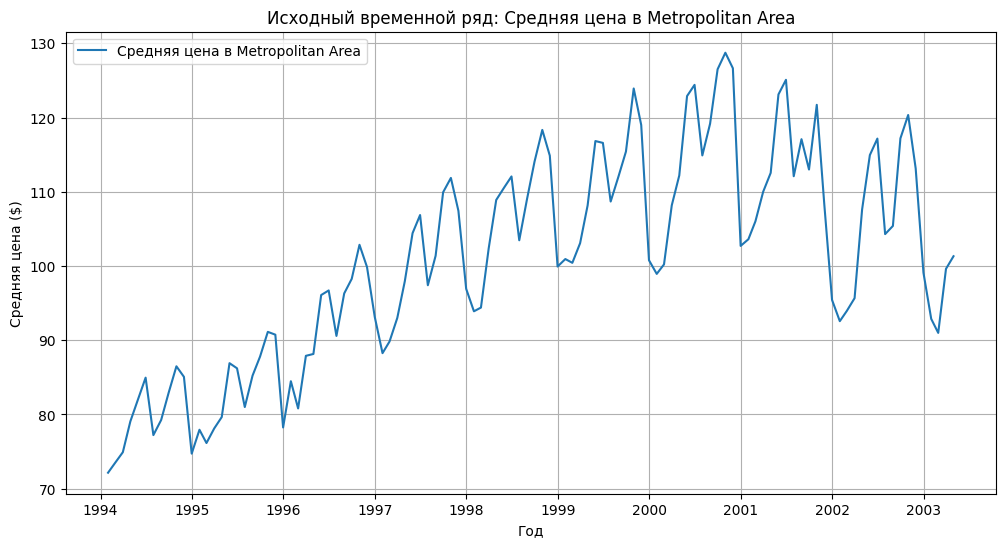

In [3]:
# Построение графика исходного временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Средняя цена в Metropolitan Area')
plt.title('Исходный временной ряд: Средняя цена в Metropolitan Area')
plt.xlabel('Год')
plt.ylabel('Средняя цена ($)')
plt.grid(True)
plt.legend()
plt.show()

### __Декомпозиция ряда на тренд, сезонность и остатки__

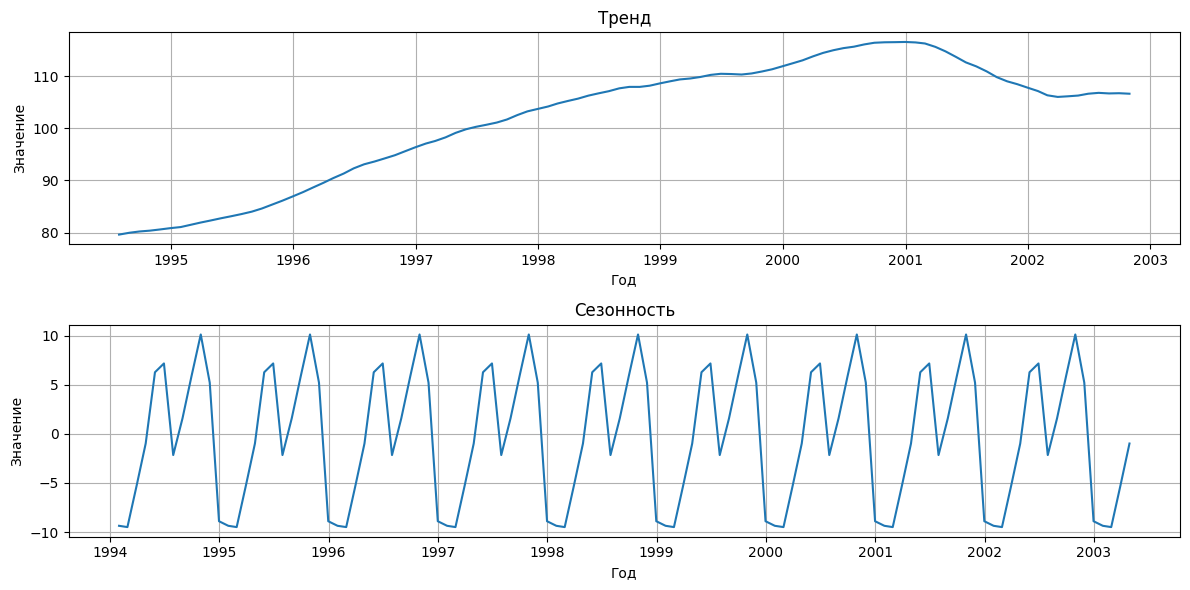

In [4]:
result = seasonal_decompose(time_series, model='additive', period=12)

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(result.trend)
plt.title('Тренд')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.grid(True)

plt.subplot(212)
plt.plot(result.seasonal)
plt.title('Сезонность')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.grid(True)

plt.tight_layout()
plt.show()

### __SARIMA модель__

/home/xzqtbl/VisualStudioCodeProjects/Artificial_Intelligence_Technologies/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/xzqtbl/VisualStudioCodeProjects/Artificial_Intelligence_Technologies/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33344D+00    |proj g|=  9.57305D-02

At iterate    5    f=  2.29396D+00    |proj g|=  1.83172D-02

At iterate   10    f=  2.29215D+00    |proj g|=  8.80121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   3.350D-06   2.292D+00
  F =   2.2921448779362534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


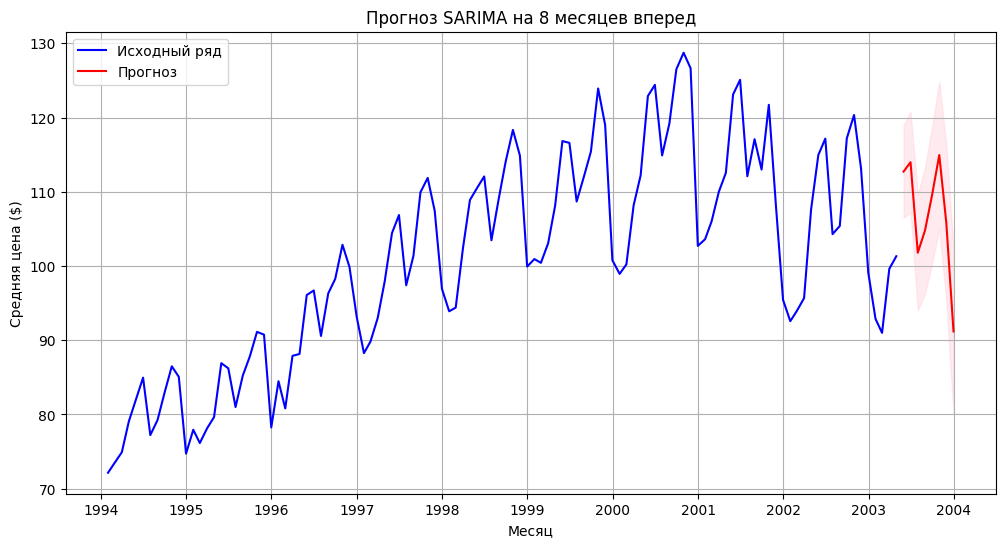

In [5]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12
model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Прогноз на 8 месяцев вперед
forecast_steps = 8
forecast = results.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Исходный ряд', color='blue')
plt.plot(forecast.predicted_mean, label='Прогноз', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Прогноз SARIMA на 8 месяцев вперед')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена ($)')
plt.legend()
plt.grid(True)
plt.show()

### __Вывод спрогнозированных значений__

In [6]:
forecast_values = forecast.predicted_mean[-forecast_steps:]
print('Спрогнозированные значения на 8 месяцев вперед:')
print(forecast_values)

Спрогнозированные значения на 8 месяцев вперед:
2003-05-31    112.722734
2003-06-30    113.985369
2003-07-31    101.787402
2003-08-31    104.803568
2003-09-30    109.524337
2003-10-31    114.952023
2003-11-30    105.880941
2003-12-31     91.182509
Freq: ME, Name: predicted_mean, dtype: float64
